In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os.path
import math

### Import data

In [2]:
which_search = 'search_03'
logfile_path = "all_log.txt"

# open the file:
with open(logfile_path, "r") as fd: # import the results file 
    logfile = fd.read().splitlines() # read in the results
    logfile_split = [] 
    for line in logfile:
        logfile_split.append(line.split()) # save each line to the list logfile_split
fd.close()
print("number of hits:", len(logfile_split))

# what is in this logfile_split file?
print(f'Each line is a "hit".')
print(f'There are {len(logfile_split)} lines')
print(f'Each line has {len(logfile_split[0])} entries. Entries can include donor name, CDRH3, etc.')
print(f'Here is an example of what is in the first line:')

print(f'\t Donor:      {logfile_split[0][2]}')
print(f'\t Vgene:      {logfile_split[0][3]}')
print(f'\t Dgene:      {logfile_split[0][4]}')
print(f'\t Jgene:      {logfile_split[0][5]}')
print(f'\t CDRH3:      {logfile_split[0][8]}')

number of hits: 93891
Each line is a "hit".
There are 93891 lines
Each line has 13 entries. Entries can include donor name, CDRH3, etc.
Here is an example of what is in the first line:
	 Donor:      Donor-3
	 Vgene:      IGHV2-26*01
	 Dgene:      IGHD4-17*01
	 Jgene:      IGHJ5*02
	 CDRH3:      ARFLEDDYGDYARCNWFDP


### Count genes

In [3]:
print(f'There are {len(logfile_split)} sequences')

IGHD_possible = ['IGHD1', 'IGHD2', 'IGHD3', 'IGHD4', 'IGHD5', 'IGHD6','IGHD7']

IGHD1 = [] 
IGHD2 = [] 
IGHD3 = [] 
IGHD4 = [] 
IGHD5 = [] 
IGHD6 = [] 
IGHD7 = [] 
for line in range(len(logfile_split)): # for each line 
    for entry in range(len(logfile_split[line])): # for each entry in each line
        if 'IGHD1' in logfile_split[line][entry]:
            IGHD1.append(1)
        if 'IGHD2' in logfile_split[line][entry]:
            IGHD2.append(1)
        if 'IGHD3' in logfile_split[line][entry]:
            IGHD3.append(1)
        if 'IGHD4' in logfile_split[line][entry]:
            IGHD4.append(1)
        if 'IGHD5' in logfile_split[line][entry]:
            IGHD5.append(1)
        if 'IGHD6' in logfile_split[line][entry]:
            IGHD6.append(1)
        if 'IGHD7' in logfile_split[line][entry]:
            IGHD7.append(1)

There are 93891 sequences


In [4]:
donor_names = []
cdrh3_seqs  = []
full_seqs   = []
jgene = []
dgene = []

for line in range(len(logfile_split)): # for each line 
    for entry in range(len(logfile_split[line])): # for each entry in each line
        if logfile_split[line][entry].rfind("IGHV") == 0: # find which entry the Vgene is at 
            jgene.append(logfile_split[line][entry])
            dgene.append(logfile_split[line][entry+1])
            if 'csv' in logfile_split[line][entry-1]: # if a .csv file is right before the Vgene,
                donor_names.append("no_donor_name_found") # then this line has no donor name
            else: # if the .csv line is not right before the Vgene, 
                donor_names.append(logfile_split[line][entry-1]) # then save the reported donor name   
        if logfile_split[line][entry].isdigit() == True:
            if int(logfile_split[line][entry]) == len(logfile_split[line][entry-1]):
                cdrh3_seqs.append(logfile_split[line][entry-1])     
    full_seqs.append(logfile_split[line][-2])

In [5]:
print(np.unique(dgene), len(dgene))

['IGHD1-1*01' 'IGHD1-26*01' 'IGHD1-7*01' 'IGHD2-15*01' 'IGHD2-2*01'
 'IGHD2-2*02' 'IGHD2-2*03' 'IGHD2-21*01' 'IGHD2-21*02' 'IGHD2-8*01'
 'IGHD3-10*01' 'IGHD3-16*01' 'IGHD3-16*02' 'IGHD3-22*01' 'IGHD3-3*01'
 'IGHD3-9*01' 'IGHD3/OR15-3a*01' 'IGHD4-11*01' 'IGHD4-17*01' 'IGHD4-23*01'
 'IGHD4-4*01' 'IGHD4/OR15-4a*01' 'IGHD5-12*01' 'IGHD5-18*01' 'IGHD5-24*01'
 'IGHD6-13*01' 'IGHD6-19*01' 'IGHD6-25*01' 'IGHD6-6*01'] 93891


In [6]:
dgenes_unique = np.unique(dgene)
dgene_counts = []
for d in range(len(dgenes_unique)):
    counter = []
    for i in range(len(dgene)):
        if dgene[i] == dgenes_unique[d]:
            #print(jgene[i], jgenes_unique[j])
            counter.append(1)
    dgene_counts.append(sum(counter))

In [7]:
import numpy as np
import matplotlib.pyplot as plt

specific_d_genes = ["IGHD1-1*01","IGHD1-26*01","IGHD1-7*01","IGHD2-15*01","IGHD2-2*01","IGHD2-2*02","IGHD2-2*03","IGHD2-21*01","IGHD2-21*.02","IGHD2-8*01","IGHD3-10*01","IGHD3-16*01","IGHD3-16*.02","IGHD3-22*01","IGHD3-3*01","IGHD3-9*01","IGHD3/OR15-3a*01","IGHD4-11*01","IGHD4-17*01","IGHD4-23*01","IGHD4-4*01","IGHD4/OR15-4a*01","IGHD5-12*01","IGHD5-18*01","IGHD5-24*01","IGHD6-13*01","IGHD6-19*01","IGHD6-25*01","IGHD6-6*01"]

# load in the search data results:
numerator = np.load('EDDYG_search_dgenes_with_no_and_noname.npy')

sample_data_path = '/Users/ssolieva/Desktop/Kulp_lab/projects/OAS_database_searches/gene_counts/IGHD/specific_genes/final_dgenes_counts_output.txt'

with open(sample_data_path) as f:
    lines = [line.rstrip() for line in f]
    
bar_plot_data = []
for line in lines:
    split_line = line.split(" ")
    bar_plot_data.append(int(split_line[1]))

#print(f'tracking progress: {np.sum(bar_plot_data)/1000000} million')
total_seqs_in_OAS = 1525390191
denominator = np.array(bar_plot_data)/total_seqs_in_OAS

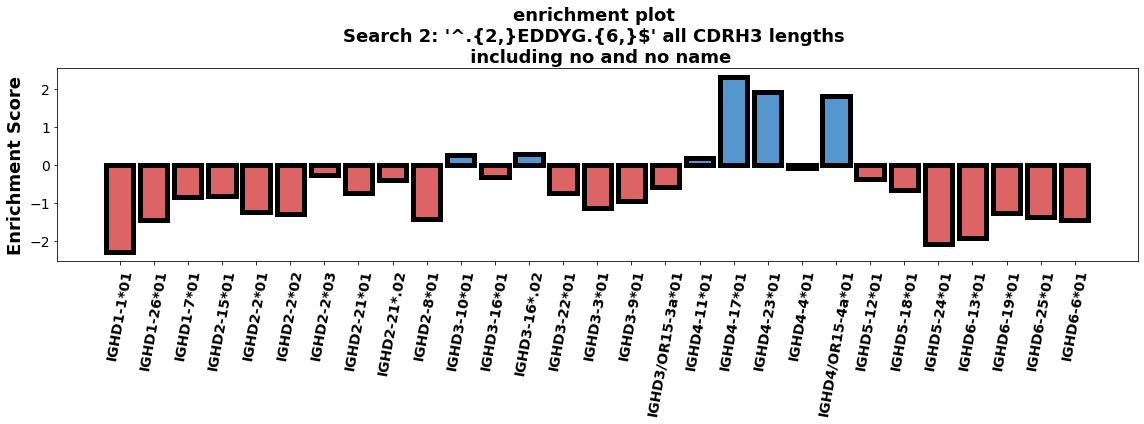

In [8]:
enrichment = np.log10(numerator/denominator)
positive_color='#5596ce'
negative_color='#dc6464'
colors = []
for i in range(len(enrichment)):
    if enrichment[i] <= 0:
        colors.append(negative_color)
    if enrichment[i] > 0:
        colors.append(positive_color)
        
plt.figure(figsize=[16,6])
plt.ylabel('Enrichment Score', fontsize=18, weight='bold')
plt.bar(specific_d_genes, np.log10(numerator/denominator), color=colors, edgecolor='k', linewidth=5)
plt.xticks(fontsize=14, rotation=80, weight='bold')
plt.title("enrichment plot \nSearch 2: '^.{2,}EDDYG.{6,}$' all CDRH3 lengths \n including no and no name", fontsize=18, weight='bold')
#plt.yscale('log')
plt.yticks(fontsize=14)
#plt.ylim(-5,5)
plt.tight_layout()
#plt.savefig("log_enrichment_plot_2colors.pdf", dpi=300)
plt.show()